In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
import json
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cpu_errors = []
cpu_times = []
gpu_errors = []
gpu_times = []

with open('/content/drive/MyDrive/gpu_errors.txt') as f:
  gpu_errors = json.load(f)
with open('/content/drive/MyDrive/gpu_times.txt', 'r') as f:
  gpu_times = json.load(f)
with open('/content/drive/MyDrive/cpu_errors.txt', 'r') as f:
  cpu_errors = json.load(f)
with open('/content/drive/MyDrive/cpu_times.txt', 'r') as f:
  cpu_times = json.load(f)

In [ ]:
distances = np.arange(0.7, 0.8, 0.005)

[4.45319840933873, 4.75015333705043, 4.730593142155068, 4.716831340646384, 4.838881865827915, 4.422454676835578, 4.858909732767649, 4.622766358129905, 4.8000221593474395, 4.9094427173870905, 4.885897509116254, 4.832969093549338, 4.705438043155431, 4.681498820494328, 4.798776755393644, 4.8713950157705685, 4.719927780640361, 4.865547643067728, 5.005029715384225, 4.810887798936884, 4.558043289603468]
Max Speedup:  5.005029715384225


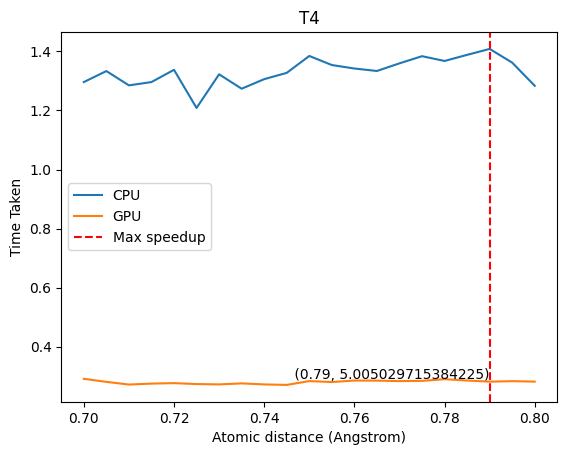

In [ ]:
speedups = [ai / bi for ai, bi in zip(cpu_times, gpu_times)]
max_speedup = max(speedups)
max_index = speedups.index(max_speedup)

print(speedups)
print("Max Speedup: ", cpu_times[max_index]/gpu_times[max_index])

plt.plot(distances, cpu_times, label="CPU")
plt.plot(distances, gpu_times, label="GPU")
plt.axvline(x=distances[max_index], color='red', linestyle='--', label='Max speedup')
plt.text(distances[max_index], gpu_times[max_index], f' ({distances[max_index]}, {cpu_times[max_index]/gpu_times[max_index]})',
         horizontalalignment='right', verticalalignment='bottom')
plt.xlabel("Atomic distance (Angstrom)")
plt.ylabel("Time Taken")
plt.title("T4")
plt.legend()
plt.show()

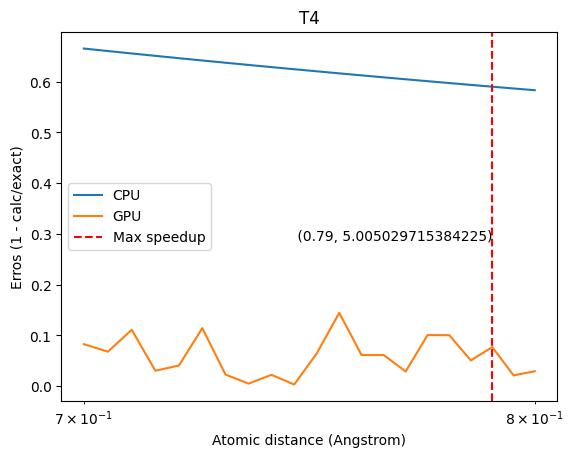

In [ ]:
plt.plot(distances, cpu_errors, label="CPU")
plt.plot(distances, gpu_errors, label="GPU")
plt.axvline(x=distances[max_index], color='red', linestyle='--', label='Max speedup')
plt.text(distances[max_index], gpu_times[max_index], f' ({distances[max_index]}, {cpu_times[max_index]/gpu_times[max_index]})',
         horizontalalignment='right', verticalalignment='bottom')
plt.xlabel("Atomic distance (Angstrom)")
plt.xscale('log')
plt.ylabel("Erros (1 - calc/exact)")
plt.title("T4")
plt.legend()
plt.show()

Compairing all **optimizers** best suited for GPU

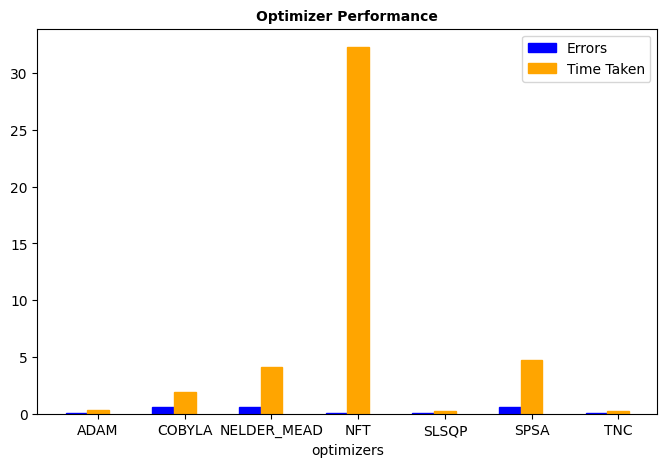

In [ ]:
# optimizers = ["ADAM", "COBYLA", "NELDER_MEAD", "NFT", "P_BFGS", "SLSQP", "SPSA", "TNC"]
optimizers = ["ADAM", "COBYLA", "NELDER_MEAD", "NFT", "SLSQP", "SPSA", "TNC"]
errors = [0.03341336626610776, 0.6223702620947797, 0.6120162303315587, 0.02845460125355977, 0.10325670920228029,  0.6356428389492261, 0.09274471359068263]
times = [0.30144476890563965, 1.8719344329833985, 4.1568592929840085, 32.29561785697937, 0.2379605722427368, 4.692626051902771, 0.24109113216400146]

barWidth = 0.25
br1 = np.arange(len(errors))
br2 = [x + barWidth for x in br1]
plt.figure(figsize=(8,5))
plt.bar(br1, errors, color ='blue', width = barWidth,
        edgecolor ='blue', label ='Errors')
plt.bar(br2, times, color ='orange', width = barWidth,
        edgecolor ='orange', label ='Time Taken')

plt.xlabel('optimizers')
plt.xticks([r + barWidth for r in range(len(errors))],
        optimizers)

plt.title("Optimizer Performance", fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
distances = np.arange(0.7, 0.8, 0.005)

optimizer1_errors = []
optimizer1_times = []

optimizer2_errors = []
optimizer2_times = []

optimizer3_errors = []
optimizer3_times = []

with open('/content/drive/MyDrive/opt1_errors.txt') as f:
  optimizer1_errors = json.load(f)

with open('/content/drive/MyDrive/opt1_times.txt') as f:
  optimizer1_times = json.load(f)

with open('/content/drive/MyDrive/opt2_errors.txt') as f:
  optimizer2_errors = json.load(f)

with open('/content/drive/MyDrive/opt2_times.txt') as f:
  optimizer2_times = json.load(f)

with open('/content/drive/MyDrive/opt3_errors.txt') as f:
  optimizer3_errors = json.load(f)

with open('/content/drive/MyDrive/opt3_times.txt') as f:
  optimizer3_times = json.load(f)

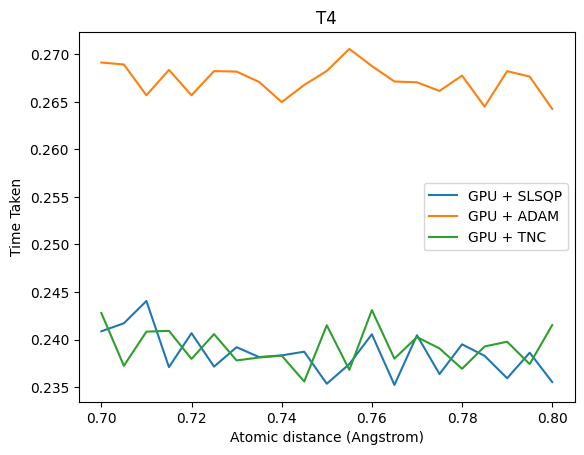

In [ ]:
plt.plot(distances, optimizer1_times, label="GPU + SLSQP")
plt.plot(distances, optimizer2_times, label="GPU + ADAM")
plt.plot(distances, optimizer3_times, label="GPU + TNC")
plt.xlabel("Atomic distance (Angstrom)")
plt.ylabel("Time Taken")
plt.title("T4")
plt.legend()
plt.show()

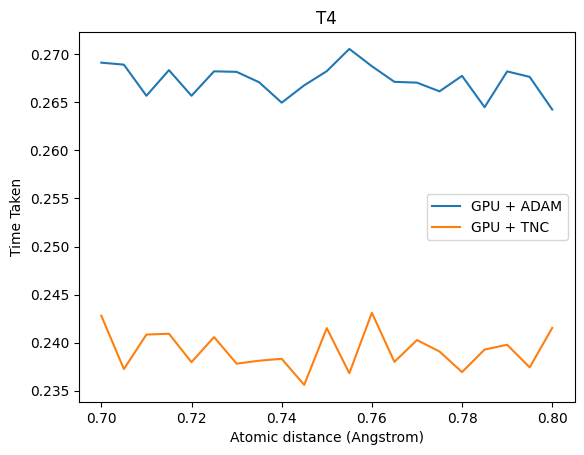

In [ ]:
plt.plot(distances, optimizer2_times, label="GPU + ADAM")
plt.plot(distances, optimizer3_times, label="GPU + TNC")
plt.xlabel("Atomic distance (Angstrom)")
plt.ylabel("Time Taken")
plt.title("T4")
plt.legend()
plt.show()

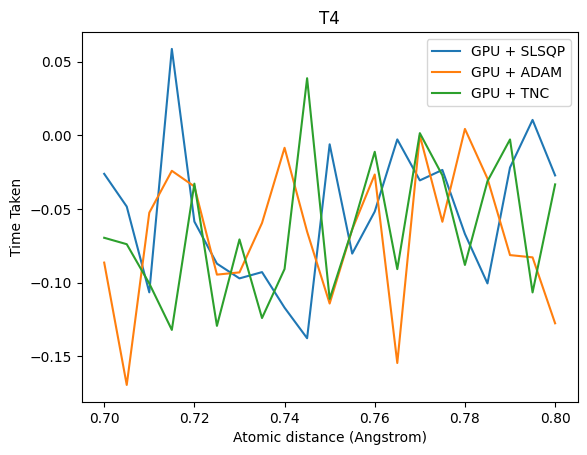

In [ ]:
plt.plot(distances, optimizer1_errors, label="GPU + SLSQP")
plt.plot(distances, optimizer2_errors, label="GPU + ADAM")
plt.plot(distances, optimizer3_errors, label="GPU + TNC")
plt.xlabel("Atomic distance (Angstrom)")
plt.ylabel("Time Taken")
plt.title("T4")
plt.legend()
plt.show()

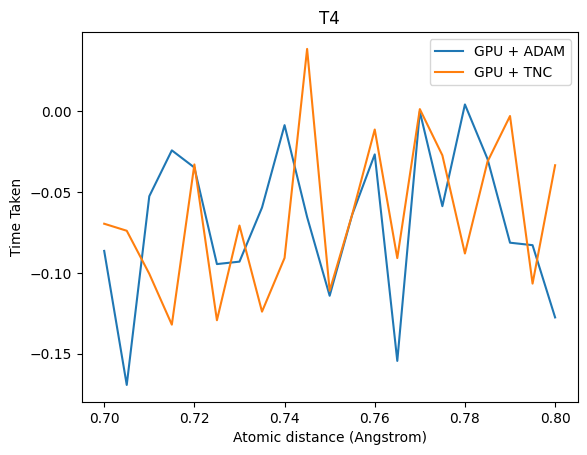

In [ ]:
plt.plot(distances, optimizer2_errors, label="GPU + ADAM")
plt.plot(distances, optimizer3_errors, label="GPU + TNC")
plt.xlabel("Atomic distance (Angstrom)")
plt.ylabel("Time Taken")
plt.title("T4")
plt.legend()
plt.show()

Ideas:

Find the top for dist = 0.735 optimizers and measure them against all of the distances for gpu.

Same setup for LiH and H2O with the optimum

Performance of GPU against different **resilience levels**

In [ ]:
gpu_errorsR1 = []
gpu_timesR1 = []
gpu_errorsR2 = []
gpu_timesR2 = []
gpu_errorsR3 = []
gpu_timesR3 = []


with open('/content/drive/MyDrive/gpu_errorsR1.txt') as f:
  gpu_errorsR1 = json.load(f)
with open('/content/drive/MyDrive/gpu_timesR1.txt') as f:
  gpu_timesR1 = json.load( f)
with open('/content/drive/MyDrive/gpu_errorsR2.txt') as f:
  gpu_errorsR2 = json.load(f)
with open('/content/drive/MyDrive/gpu_timesR2.txt') as f:
  gpu_timesR2 = json.load(f)
with open('/content/drive/MyDrive/gpu_errorsR3.txt') as f:
  gpu_errorsR3 = json.load(f)
with open('/content/drive/MyDrive/gpu_timesR3.txt') as f:
  gpu_timesR3 = json.load(f)

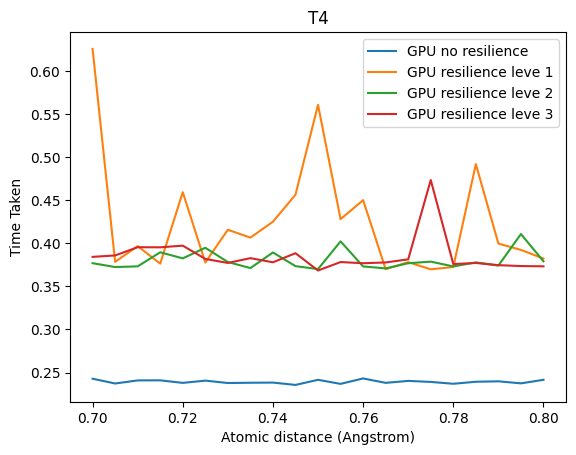

In [ ]:
from scipy import signal

# gpu_timesR1 = signal.savgol_filter(gpu_timesR1, window_length=11, polyorder=3, mode="nearest")
# gpu_timesR2 = signal.savgol_filter(gpu_timesR2, window_length=11, polyorder=3, mode="nearest")
# gpu_timesR3 = signal.savgol_filter(gpu_timesR3, window_length=11, polyorder=3, mode="nearest")

# gpu_errorsR1 = signal.savgol_filter(gpu_errorsR1, window_length=11, polyorder=3, mode="nearest")
# gpu_errorsR2 = signal.savgol_filter(gpu_errorsR2, window_length=11, polyorder=3, mode="nearest")
# gpu_errorsR3 = signal.savgol_filter(gpu_errorsR3, window_length=11, polyorder=3, mode="nearest")

plt.plot(distances, optimizer3_times, label="GPU no resilience")
plt.plot(distances, gpu_timesR1, label="GPU resilience leve 1")
plt.plot(distances, gpu_timesR2, label="GPU resilience leve 2")
plt.plot(distances, gpu_timesR3, label="GPU resilience leve 3")
plt.xlabel("Atomic distance (Angstrom)")
plt.ylabel("Time Taken")
plt.title("T4")
plt.legend()
plt.show()

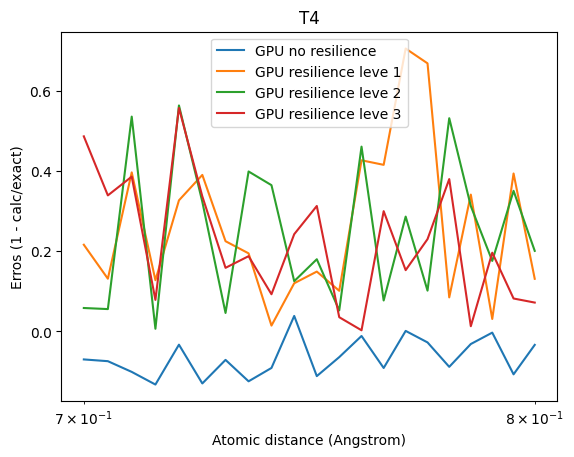

In [ ]:
plt.plot(distances,  optimizer3_errors, label="GPU no resilience")
plt.plot(distances, gpu_errorsR1, label="GPU resilience leve 1")
plt.plot(distances, gpu_errorsR2, label="GPU resilience leve 2")
plt.plot(distances, gpu_errorsR3, label="GPU resilience leve 3")
plt.xlabel("Atomic distance (Angstrom)")
plt.xscale('log')
plt.ylabel("Erros (1 - calc/exact)")
plt.title("T4")
plt.legend()
plt.show()

Comparing LiH and H2 performance on GPU

## H2

**ON T4**

Exact energy = -1.1373060357534008
______________________________________


On CPU: VQE on H2 molecule
Time taken: 8.11376121520996, Energy: -1.8541377342826122
Error: 63.02891886565527
______________________________________


On GPU: VQE on H2 molecule
Time taken: 0.2627769947052002, Energy: -1.10074013664617
Error: 3.215132774970988

**On A100**
Exact energy = -1.1373060357533995
______________________________________


On CPU: VQE on H2 molecule
Time taken: 8.73912682056427, Energy: -1.856931512359576
Error: 63.274567617102825
______________________________________


On GPU: VQE on H2 molecule
Time taken: 0.2734169292449951, Energy: -1.1673559103238578
Error: 2.6421977573126973

**On V100**
Exact energy = -1.1373060357533995
______________________________________


On CPU: VQE on H2 molecule
Time taken: 8.727696404457092, Energy: -1.8542001908801058
Error: 63.034410491966256
______________________________________


On GPU: VQE on H2 molecule
Time taken: 0.26947972774505613, Energy: -1.1267342408187042
Error: 0.929547070212468

## LiH

**On T4**

For CPU:
Time taken: 1090.0767712593079 Energy: -7.740473811389541 Exact Energy: -7.882096599921158


For GPU:
Time taken: 119.05754041671753 Energy: -7.218411634282892 Exact Energy: -7.882096599921147

**On A100**

For CPU:
Time taken: 1011.0205535888672 Energy: -7.562040353297816 Exact Energy: -7.882096599921154
============================


For GPU:
Time taken: 115.25452136993408 Energy: -7.214884212088578 Exact Energy: -7.882096599921158

**On V100**
For CPU:

Time taken: 953.9991099834442 Energy: -7.718441733468636 Exact Energy: -7.882096599921158

For GPU:
  exact_energy, energy, time_taken = UCCSD_VQE_LiH(True, dist)
Time taken: 115.49975562095642 Energy: -7.244706752023602 Exact Energy: -7.882096599921149


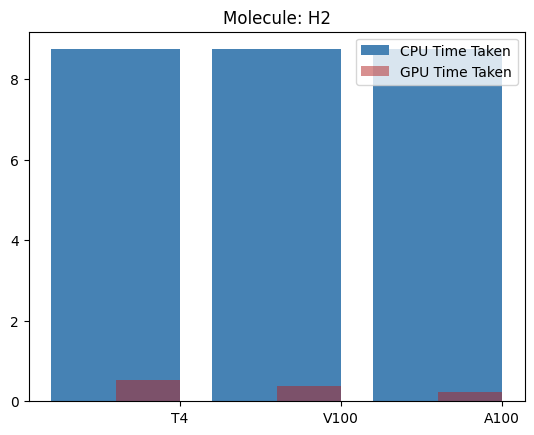

In [ ]:
# for h2
width = 0.8

with open('/content/drive/MyDrive/H2_cpu_times.txt') as f:
  cpu_times = json.load(f)

with open('/content/drive/MyDrive/H2_gpu_times.txt') as f:
  gpu_times = json.load(f)

indices = np.arange(len(cpu_times))

plt.bar(indices, cpu_times, width=width,
        color='steelblue', label='CPU Time Taken')
plt.bar([i+0.25*width for i in indices], gpu_times,
        width=0.5*width, color='firebrick', alpha=0.5, label='GPU Time Taken')

plt.xticks(indices+width/2.,
           ["T4", "V100", "A100"] )

plt.legend()
plt.title("Molecule: H2")
plt.show()

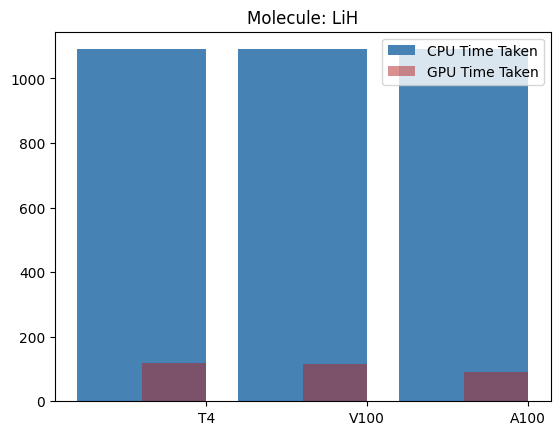

In [ ]:
# for liH
width = 0.8

with open('/content/drive/MyDrive/LiH_cpu_times.txt') as f:
  cpu_times = json.load(f)

with open('/content/drive/MyDrive/LiH_gpu_times.txt') as f:
  gpu_times = json.load(f)

indices = np.arange(len(cpu_times))

plt.bar(indices, cpu_times, width=width,
        color='steelblue', label='CPU Time Taken')
plt.bar([i+0.25*width for i in indices], gpu_times,
        width=0.5*width, color='firebrick', alpha=0.5, label='GPU Time Taken')

plt.xticks(indices+width/2.,
           ["T4", "V100", "A100"] )

plt.legend()
plt.title("Molecule: LiH")

plt.show()